In [1]:
#!pip install geonamescache
import tweepy
import numpy
import pandas as pd
import requests
from bs4 import BeautifulSoup
import importlib
import json
from helper import *
from selenium import webdriver
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import linear_model


In [2]:
pd.options.display.max_columns = 200

In [3]:
df=pd.read_csv("out.csv")
df=pd.concat([df,pd.read_csv("out2.csv"),pd.read_csv("out3.csv"),pd.read_csv("out4.csv"),pd.read_csv("out5.csv"),pd.read_csv("out6.csv")][:3])
df.head()

,Unnamed: 0,name,age,city,country,gender,acount age,total tweets,followers,following,respectability,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtags,hashtag count,trending,using trends?,link to tweet
0,0,CamuyArenas_AA,NaN,Puente,United States,NaN,3.2,228,50,22,0.440000,False,Just posted a photo @ Estadio Juan F.Cheo Lópe...,13,0,0,0,0,11,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/CamuyArenas_AA/status/...
1,1,16p11dot2ds,NaN,Georgia,United States,NaN,4.9,32312,33,481,14.575758,False,This is a prep free zone. https://t.co/2qqlLxy...,336,1,0,0,1,8,True,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/16p11dot2ds/status/161...
2,2,PoopScoopSF,NaN,Downtown,United States,NaN,4.7,163626,415,125,0.301205,False,"""Big poop front of our door."" (Downtown, D3) h...",9,0,0,0,1,10,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/PoopScoopSF/status/161...
3,3,wchazz,NaN,Wesley Chapel,United States,NaN,15.4,48876,377,951,2.522546,False,"2nd cardio, target calories 1k @ Wesley Chapel...",4,0,0,0,0,10,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wchazz/status/16139885...
4,4,wyatthebson,NaN,Pier 17,United States,NaN,16.8,24061,1366,4999,3.659590,False,Listen to PODCAST #6 SGUZR by Core Beats on Tn...,13,0,0,0,0,11,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wyatthebson/status/161...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20547 entries, 0 to 1414
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20547 non-null  int64  
 1   name            20547 non-null  object 
 2   age             330 non-null    float64
 3   city            20547 non-null  object 
 4   country         20547 non-null  object 
 5   gender          0 non-null      float64
 6   acount age      20547 non-null  float64
 7   total tweets    20547 non-null  int64  
 8   followers       20547 non-null  int64  
 9   following       20547 non-null  int64  
 10  respectability  20547 non-null  float64
 11  verified        20547 non-null  bool   
 12  text            20547 non-null  object 
 13  views           20547 non-null  int64  
 14  likes           20547 non-null  int64  
 15  retweets        20547 non-null  int64  
 16  quote retweets  20547 non-null  int64  
 17  comments        20547 non-null  

In [5]:
df=df.drop(["age", "gender",'hashtags','Unnamed: 0'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20547 entries, 0 to 1414
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            20547 non-null  object 
 1   city            20547 non-null  object 
 2   country         20547 non-null  object 
 3   acount age      20547 non-null  float64
 4   total tweets    20547 non-null  int64  
 5   followers       20547 non-null  int64  
 6   following       20547 non-null  int64  
 7   respectability  20547 non-null  float64
 8   verified        20547 non-null  bool   
 9   text            20547 non-null  object 
 10  views           20547 non-null  int64  
 11  likes           20547 non-null  int64  
 12  retweets        20547 non-null  int64  
 13  quote retweets  20547 non-null  int64  
 14  comments        20547 non-null  int64  
 15  word count      20547 non-null  int64  
 16  is quote        20547 non-null  bool   
 17  hashtag count   20547 non-null  

In [7]:
df.describe(include='all')

,name,city,country,acount age,total tweets,followers,following,respectability,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,link to tweet
count,20547,20547,20547,20547.000000,2.054700e+04,2.054700e+04,20547.000000,20547.000000,20547,20547,20547.000000,20547.000000,20547.000000,20547.000000,20547.000000,20547.000000,20547,20547.000000,20547,20547,20547
unique,12095,3381,5,NaN,NaN,NaN,NaN,NaN,2,18127,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,246,2,18163
top,Dawesfgmailcom6,Auckland,United States,NaN,NaN,NaN,NaN,NaN,False,@whosjordi's account is temporarily unavailabl...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,"['Donny', 'Trossard', 'Jennie', 'Phineas', 'Fe...",False,https://www.twitter.com/LaurieFleming/status/1...
freq,202,1573,5147,NaN,NaN,NaN,NaN,NaN,19981,5,NaN,NaN,NaN,NaN,NaN,NaN,15308,NaN,1536,19699,2
mean,NaN,NaN,NaN,10.246070,6.900196e+04,5.651450e+03,1676.641554,2.081166,NaN,NaN,1066.121186,13.599893,2.033192,0.151214,1.015720,15.951039,NaN,0.582129,NaN,NaN,NaN
std,NaN,NaN,NaN,4.727793,7.127004e+05,1.082666e+05,8047.448325,6.259152,NaN,NaN,11522.349999,196.329459,44.212679,2.709742,9.022906,12.494057,NaN,1.652147,NaN,NaN,NaN
min,NaN,NaN,NaN,0.100000,1.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,5.800000,2.785000e+03,2.320000e+02,256.000000,0.529945,NaN,NaN,33.000000,0.000000,0.000000,0.000000,0.000000,7.000000,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,11.500000,1.187400e+04,6.750000e+02,645.000000,1.087361,NaN,NaN,107.000000,1.000000,0.000000,0.000000,0.000000,12.000000,NaN,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,14.300000,3.792600e+04,1.848000e+03,1575.000000,2.143751,NaN,NaN,359.000000,4.000000,0.000000,0.000000,0.000000,22.000000,NaN,0.000000,NaN,NaN,NaN


In [8]:
df['likes'].value_counts()

0       9358
1       3308
2       1681
3        979
4        707
        ... 
168        1
179        1
302        1
880        1
3042       1
Name: likes, Length: 310, dtype: int64

In [9]:
df['retweets'].value_counts()

0      16495
1       2010
2        637
3        350
4        200
       ...  
857        1
175        1
59         1
84         1
798        1
Name: retweets, Length: 119, dtype: int64

In [10]:
df['country'].value_counts()
#df['location'].vlue_counts().plot(kind='pie')


United States     5147
New Zealand       3921
United Kingdom    3841
Australia         3821
Canada            3817
Name: country, dtype: int64

<AxesSubplot:ylabel='country'>

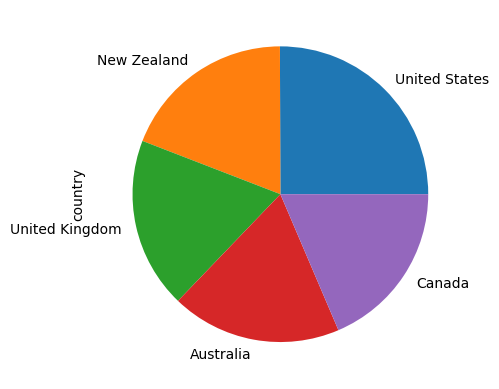

In [11]:
df['country'].value_counts().plot(kind='pie')

In [12]:

df['country'].value_counts(normalize=True)

United States     0.250499
New Zealand       0.190831
United Kingdom    0.186937
Australia         0.185964
Canada            0.185769
Name: country, dtype: float64

In [13]:
df.insert(df.columns.get_loc("respectability")+1,'is respactable?' ,[1 if x >= .75 else 0 for x in df['respectability']])

In [14]:
df['acount age'].value_counts()


14.2    487
3.2     484
15.2    433
13.2    371
12.2    363
       ... 
19.2      1
0.7       1
17.7      1
0.1       1
18.1      1
Name: acount age, Length: 184, dtype: int64

In [15]:
df['total tweets'].value_counts()

105       181
67929     126
67841      76
98047      72
37226      61
         ... 
196553      1
13683       1
17916       1
20215       1
4141        1
Name: total tweets, Length: 10447, dtype: int64

In [16]:
df.head()

,name,city,country,acount age,total tweets,followers,following,respectability,is respactable?,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,link to tweet
0,CamuyArenas_AA,Puente,United States,3.2,228,50,22,0.440000,0,False,Just posted a photo @ Estadio Juan F.Cheo Lópe...,13,0,0,0,0,11,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/CamuyArenas_AA/status/...
1,16p11dot2ds,Georgia,United States,4.9,32312,33,481,14.575758,1,False,This is a prep free zone. https://t.co/2qqlLxy...,336,1,0,0,1,8,True,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/16p11dot2ds/status/161...
2,PoopScoopSF,Downtown,United States,4.7,163626,415,125,0.301205,0,False,"""Big poop front of our door."" (Downtown, D3) h...",9,0,0,0,1,10,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/PoopScoopSF/status/161...
3,wchazz,Wesley Chapel,United States,15.4,48876,377,951,2.522546,1,False,"2nd cardio, target calories 1k @ Wesley Chapel...",4,0,0,0,0,10,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wchazz/status/16139885...
4,wyatthebson,Pier 17,United States,16.8,24061,1366,4999,3.659590,1,False,Listen to PODCAST #6 SGUZR by Core Beats on Tn...,13,0,0,0,0,11,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wyatthebson/status/161...


In [17]:
df[df.duplicated()]

,name,city,country,acount age,total tweets,followers,following,respectability,is respactable?,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,link to tweet


In [18]:
df[df['text'].duplicated()]

,name,city,country,acount age,total tweets,followers,following,respectability,is respactable?,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,link to tweet
497,CTDOT_District1,Meriden,United States,14.8,269088,967,0,0.000000,0,False,Delays - MERIDEN #I91 North 0.72 miles before ...,13,0,0,0,0,19,False,2,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/CTDOT_District1/status...
928,511nyLongIsland,Freeport,United States,16.1,389799,2398,0,0.000000,0,False,Cleared: Construction on #NY27 EB from Guy Lom...,28,0,0,0,0,13,False,1,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/511nyLongIsland/status...
1270,511NYC,New York,United States,16.5,1696853,2404,3,0.001248,0,False,Cleared: Construction on #ThrogsNeckBridge SB ...,10,0,0,0,0,11,False,1,"['#OpenDnD', 'Friday the 13th', 'Staley', 'Lor...",False,https://www.twitter.com/511NYC/status/16139865...
1272,511NY,Manhattan,United States,16.1,6020386,4234,15,0.003543,0,False,Cleared: Incident on #RFKTriboroughBridge SB a...,6,0,0,0,0,8,False,1,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/511NY/status/161398650...
1274,511NYC,Queens,United States,16.5,1696853,2404,3,0.001248,0,False,Cleared: Construction on #ThrogsNeckBridge NB ...,8,0,0,0,0,11,False,1,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/511NYC/status/16139864...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,jamesmichael_13,Plano,United States,13.5,33925,957,892,0.932079,1,False,MANCHESTER IS RED,89,0,0,0,0,3,False,0,"['Rashford', '#ManchesterDerby', '#MUNMCI', 'G...",False,https://www.twitter.com/jamesmichael_13/status...
586,jaiye_baba,Bear,United States,14.3,107999,3361,3809,1.133294,1,False,MANCHESTER IS RED,158,1,1,0,0,3,False,0,"['Rashford', '#ManchesterDerby', '#MUNMCI', 'G...",False,https://www.twitter.com/jaiye_baba/status/1614...
1034,511NYC,Manhattan,United States,16.5,1697245,2405,3,0.001247,0,False,Cleared: Incident on #NY9A NB at George Washin...,11,0,0,0,0,11,False,1,"['Rashford', '#ManchesterDerby', '#MUNMCI', 'G...",False,https://www.twitter.com/511NYC/status/16142664...
1308,511NYMidHudson,New York,United States,16.1,995657,1408,0,0.000000,0,False,Cleared: Incident on #I87NYSThruway NB at Afte...,34,0,0,0,0,16,False,1,"['Rashford', '#ManchesterDerby', '#MUNMCI', 'G...",False,https://www.twitter.com/511NYMidHudson/status/...


In [19]:
df=df.drop_duplicates(subset='text',keep=False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15714 entries, 0 to 1414
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15714 non-null  object 
 1   city             15714 non-null  object 
 2   country          15714 non-null  object 
 3   acount age       15714 non-null  float64
 4   total tweets     15714 non-null  int64  
 5   followers        15714 non-null  int64  
 6   following        15714 non-null  int64  
 7   respectability   15714 non-null  float64
 8   is respactable?  15714 non-null  int64  
 9   verified         15714 non-null  bool   
 10  text             15714 non-null  object 
 11  views            15714 non-null  int64  
 12  likes            15714 non-null  int64  
 13  retweets         15714 non-null  int64  
 14  quote retweets   15714 non-null  int64  
 15  comments         15714 non-null  int64  
 16  word count       15714 non-null  int64  
 17  is quote     

In [21]:
df['country'].value_counts(normalize=True)

United States     0.324806
United Kingdom    0.244432
Canada            0.242650
Australia         0.152730
New Zealand       0.035382
Name: country, dtype: float64

<AxesSubplot:ylabel='country'>

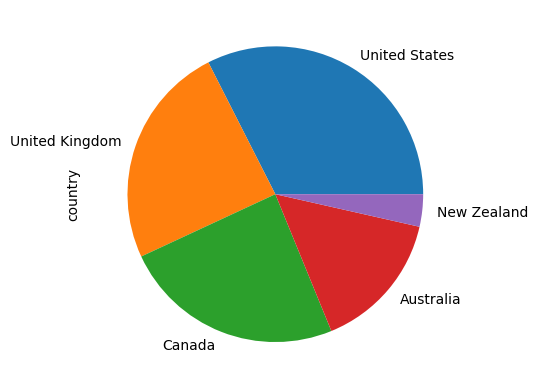

In [22]:
df['country'].value_counts().plot(kind='pie')

In [23]:
df['verified'].value_counts(normalize=True)

False    0.969454
True     0.030546
Name: verified, dtype: float64

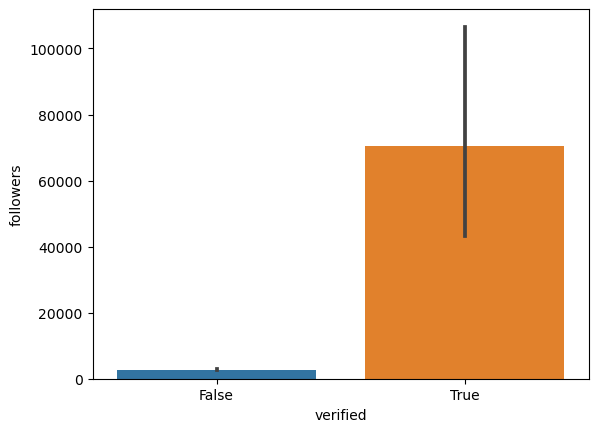

In [24]:
sns.barplot(x='verified', y='followers', data=df)
plt.show()

In [25]:
df['word count'].value_counts()

9     877
8     819
7     718
2     712
10    690
     ... 
60      1
63      1
85      1
64      1
69      1
Name: word count, Length: 67, dtype: int64

In [26]:
df['is quote'].value_counts()

False    11419
True      4295
Name: is quote, dtype: int64

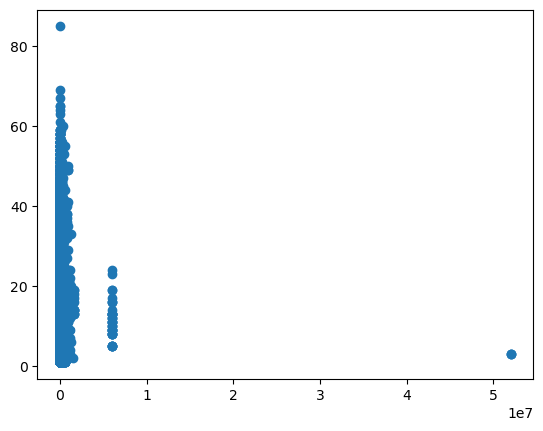

In [27]:
plt.scatter(df['total tweets'],df['word count'])

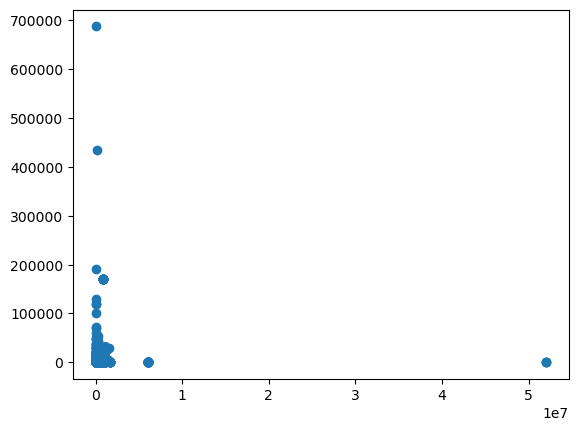

In [28]:
plt.scatter(df['total tweets'],df['following'])

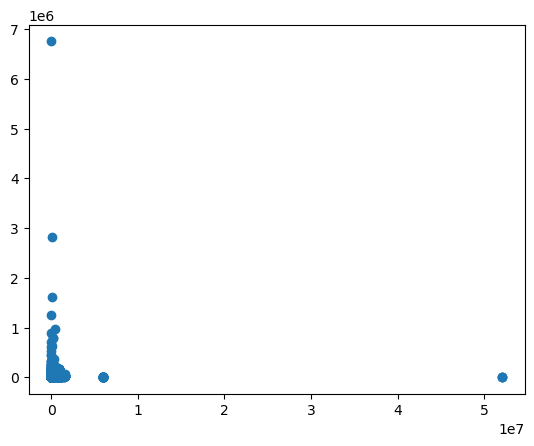

In [29]:
plt.scatter(df['total tweets'],df['followers'])

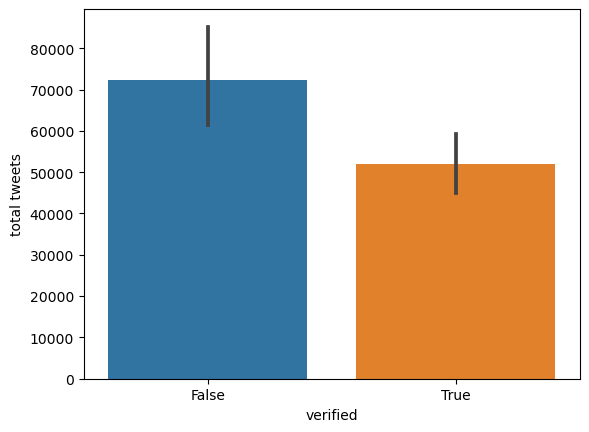

In [30]:
sns.barplot(x='verified', y='total tweets', data=df)
plt.show()

In [31]:
df['is respactable?'].value_counts(normalize=True)

1    0.662467
0    0.337533
Name: is respactable?, dtype: float64

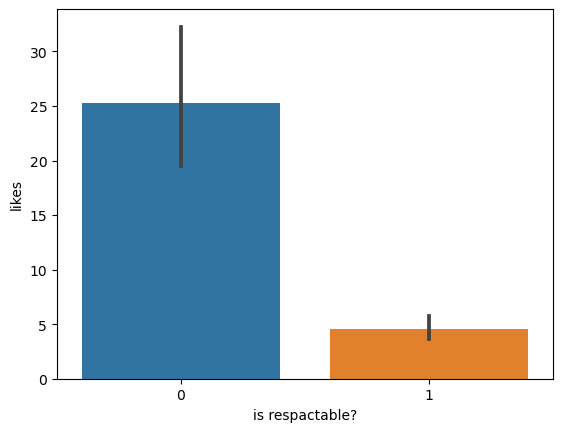

In [32]:
sns.barplot(x='is respactable?', y='likes', data=df)
plt.show()

In [33]:
df['retweets'].value_counts()

0      12509
1       1584
2        518
3        275
4        150
       ...  
190        1
111        1
175        1
59         1
798        1
Name: retweets, Length: 104, dtype: int64

In [34]:
pd.cut(df['retweets'],bins=5).value_counts()

(-4.826, 965.2]     15711
(965.2, 1930.4]         1
(1930.4, 2895.6]        1
(3860.8, 4826.0]        1
(2895.6, 3860.8]        0
Name: retweets, dtype: int64

(array([1.5711e+04, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  965.2, 1930.4, 2895.6, 3860.8, 4826. ]),
 <BarContainer object of 5 artists>)

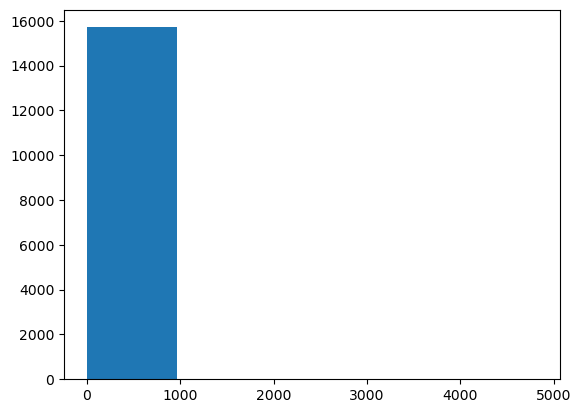

In [35]:
plt.hist(df['retweets'],bins=5)

In [36]:
df.head()

,name,city,country,acount age,total tweets,followers,following,respectability,is respactable?,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,link to tweet
0,CamuyArenas_AA,Puente,United States,3.2,228,50,22,0.440000,0,False,Just posted a photo @ Estadio Juan F.Cheo Lópe...,13,0,0,0,0,11,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/CamuyArenas_AA/status/...
1,16p11dot2ds,Georgia,United States,4.9,32312,33,481,14.575758,1,False,This is a prep free zone. https://t.co/2qqlLxy...,336,1,0,0,1,8,True,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/16p11dot2ds/status/161...
2,PoopScoopSF,Downtown,United States,4.7,163626,415,125,0.301205,0,False,"""Big poop front of our door."" (Downtown, D3) h...",9,0,0,0,1,10,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/PoopScoopSF/status/161...
3,wchazz,Wesley Chapel,United States,15.4,48876,377,951,2.522546,1,False,"2nd cardio, target calories 1k @ Wesley Chapel...",4,0,0,0,0,10,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wchazz/status/16139885...
4,wyatthebson,Pier 17,United States,16.8,24061,1366,4999,3.659590,1,False,Listen to PODCAST #6 SGUZR by Core Beats on Tn...,13,0,0,0,0,11,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wyatthebson/status/161...


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30343 (\N{CJK UNIFIED IDEOGRAPH-7687}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24481 (\N{CJK UNIFIED IDEOGRAPH-5FA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23476 (\N{CJK UNIFIED IDEOGRAPH-5BB4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_

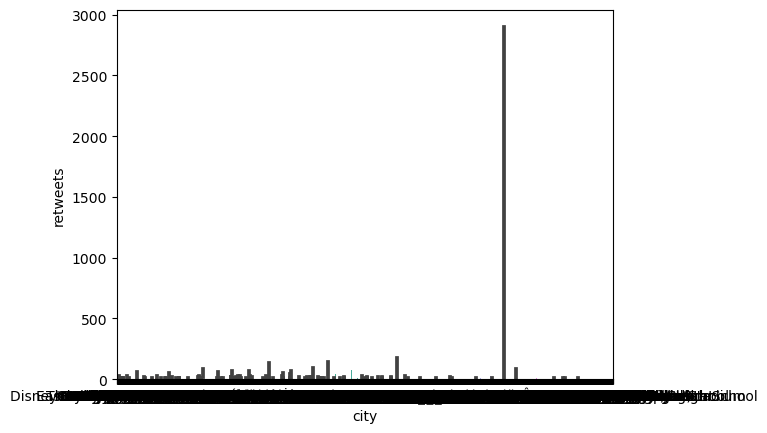

In [37]:
sns.barplot(x='city', y='retweets', data=df)
plt.show()

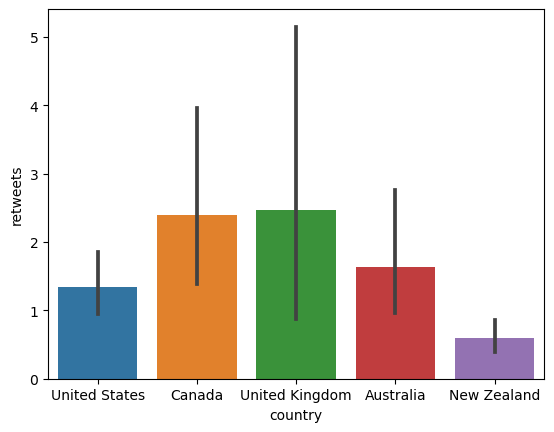

In [38]:
sns.barplot(x='country', y='retweets', data=df)
plt.show()


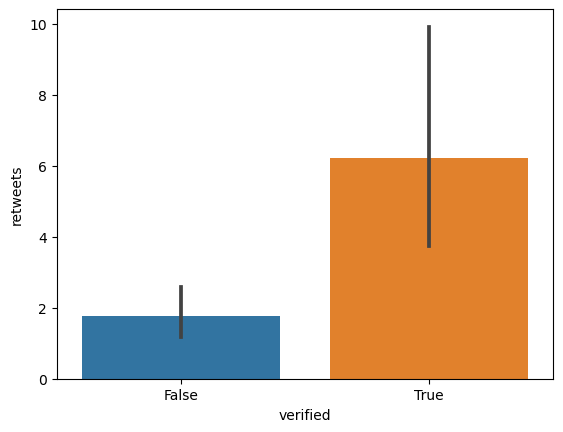

In [39]:
sns.barplot(x='verified', y='retweets', data=df)
plt.show()

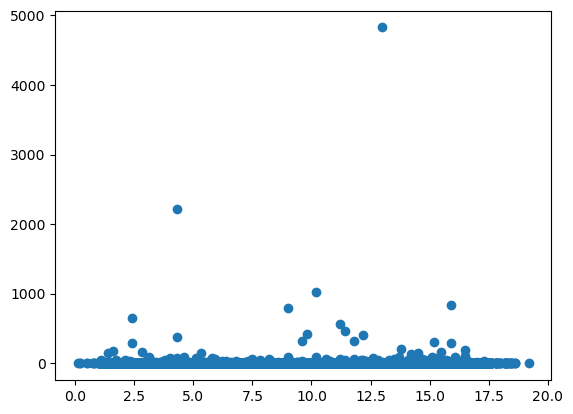

In [40]:
plt.scatter(df['acount age'],df['retweets'])

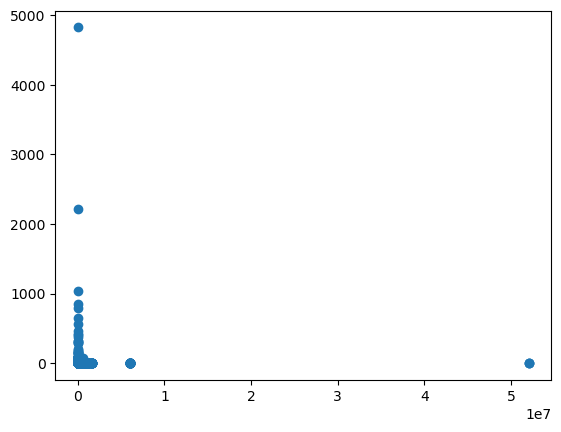

In [41]:
plt.scatter(df['total tweets'],df['retweets'])

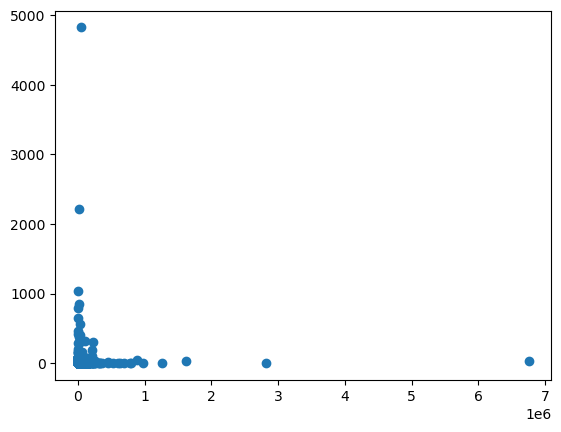

In [42]:
plt.scatter(df['followers'],df['retweets'])

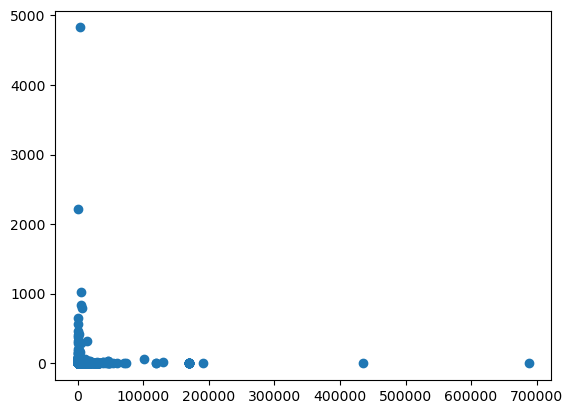

In [43]:
plt.scatter(df['following'],df['retweets'])

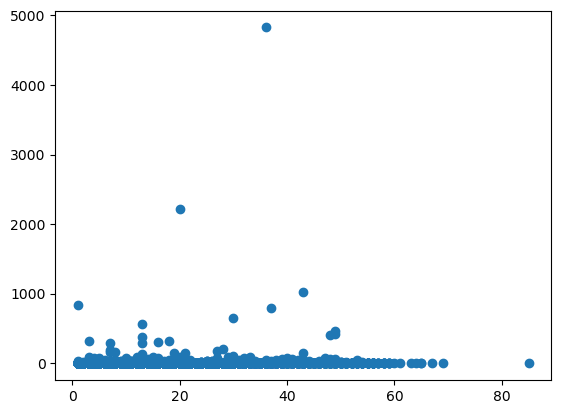

In [44]:
plt.scatter(df['word count'],df['retweets'])

In [45]:
dups = df[df['name'].duplicated(keep = False)]['name'].value_counts()

for n in dups.keys():
    if dups[n] > 2:
        df.drop(df[df['name'] == n].index,inplace = True)
        
df[df['name'].duplicated()]['name'].value_counts().max()

1

מוריד את הרובוטים המסריחים הללו

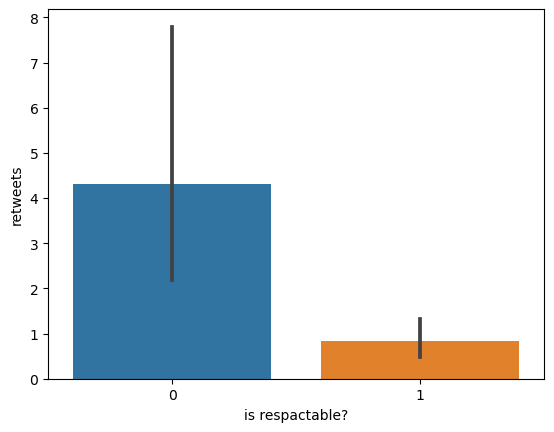

In [46]:
sns.barplot(x='is respactable?', y='retweets', data=df)
plt.show()

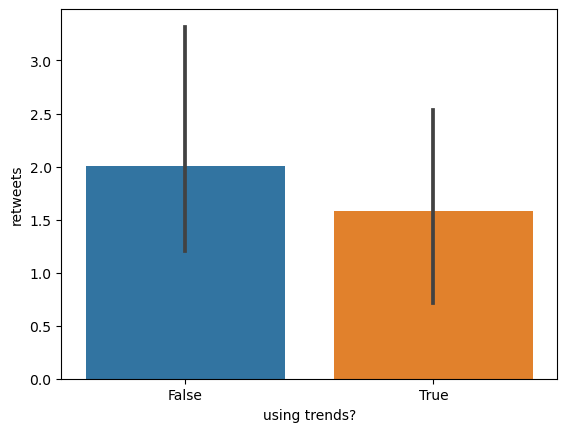

In [47]:
sns.barplot(x='using trends?', y='retweets', data=df)
plt.show()

In [48]:
df.retweets[df.retweets>0].count()

1915

In [49]:
df.retweets[df.retweets>0].count()/df.retweets.count()

0.21188315999114848

In [50]:
df.describe(include='all')

,name,city,country,acount age,total tweets,followers,following,respectability,is respactable?,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,link to tweet
count,9038,9038,9038,9038.000000,9.038000e+03,9.038000e+03,9038.000000,9038.000000,9038.000000,9038,9038,9038.000000,9038.000000,9038.000000,9038.000000,9038.000000,9038.000000,9038,9038.000000,9038,9038,9038
unique,8311,2613,5,NaN,NaN,NaN,NaN,NaN,NaN,2,9038,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,236,2,9038
top,A_ashishKumar,Toronto,United States,NaN,NaN,NaN,NaN,NaN,NaN,False,Just posted a photo @ Estadio Juan F.Cheo Lópe...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,"['#lufc', 'Gnonto', '#avfc', 'Leeds', '#AVLLEE...",False,https://www.twitter.com/CamuyArenas_AA/status/...
freq,2,323,3382,NaN,NaN,NaN,NaN,NaN,NaN,8730,1,NaN,NaN,NaN,NaN,NaN,NaN,6610,NaN,987,8718,1
mean,NaN,NaN,NaN,10.624751,2.503423e+04,4.829506e+03,1446.317659,1.894251,0.666962,NaN,NaN,1087.755477,12.323191,1.994468,0.159106,1.066608,16.654348,NaN,0.649259,NaN,NaN,NaN
std,NaN,NaN,NaN,4.477449,5.417727e+04,8.344993e+04,6019.725423,8.226239,0.471326,NaN,NaN,7957.449771,141.750203,53.737343,3.097887,10.514568,12.689812,NaN,1.749821,NaN,NaN,NaN
min,NaN,NaN,NaN,0.100000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,6.900000,2.274250e+03,2.350000e+02,286.000000,0.563787,0.000000,NaN,NaN,44.000000,0.000000,0.000000,0.000000,0.000000,7.000000,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,11.900000,8.783000e+03,6.410000e+02,682.000000,1.089680,1.000000,NaN,NaN,130.000000,1.000000,0.000000,0.000000,0.000000,13.000000,NaN,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,14.300000,2.674625e+04,1.743000e+03,1523.750000,2.082840,1.000000,NaN,NaN,437.000000,4.000000,0.000000,0.000000,1.000000,24.000000,NaN,0.000000,NaN,NaN,NaN


In [51]:
df.retweets[df.retweets>1500].count()

1

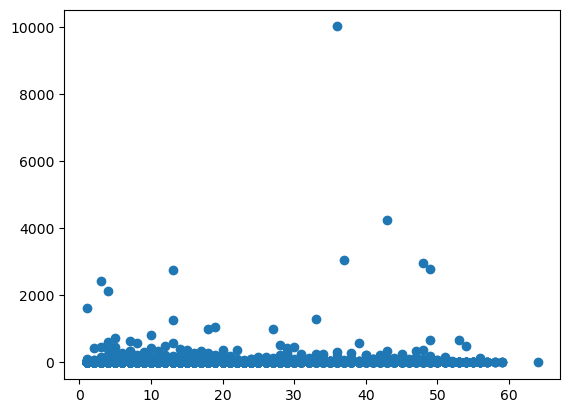

In [52]:
plt.scatter(df['word count'],df['likes'])

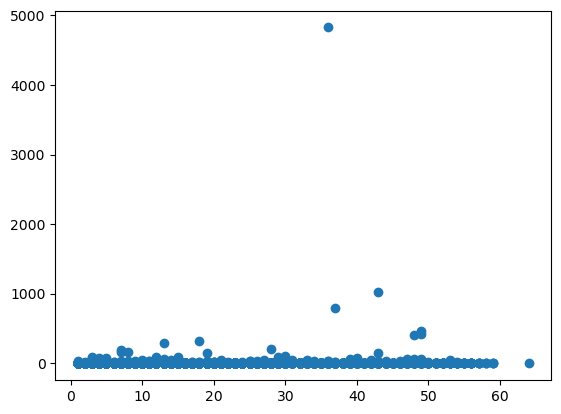

In [53]:
plt.scatter(df['word count'],df['retweets'])

(array([9.037e+03, 1.000e+00]),
 array([   0., 2413., 4826.]),
 <BarContainer object of 2 artists>)

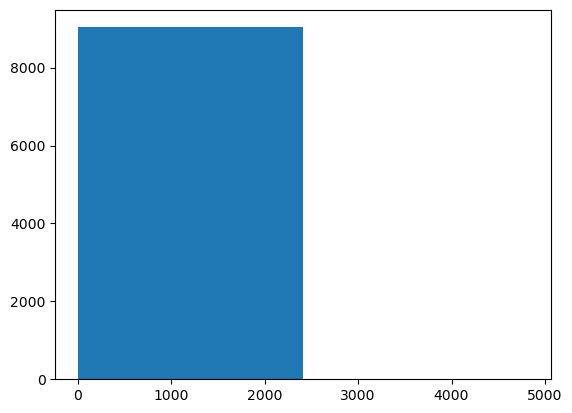

In [54]:
plt.hist(df['retweets'],bins=2)

In [55]:
df['retweets'].value_counts()

0      7123
1       943
2       294
3       173
4        86
       ... 
111       1
31        1
59        1
84        1
798       1
Name: retweets, Length: 76, dtype: int64

In [56]:
ct1=pd.crosstab(df['likes'],df['is respactable?'],normalize='index')
ct1

is respactable?,0,1
likes,,
0,0.256832,0.743168
1,0.274733,0.725267
2,0.314110,0.685890
3,0.336842,0.663158
4,0.337423,0.662577
...,...,...
2789,1.000000,0.000000
2958,1.000000,0.000000
3042,0.000000,1.000000


<AxesSubplot:xlabel='likes'>

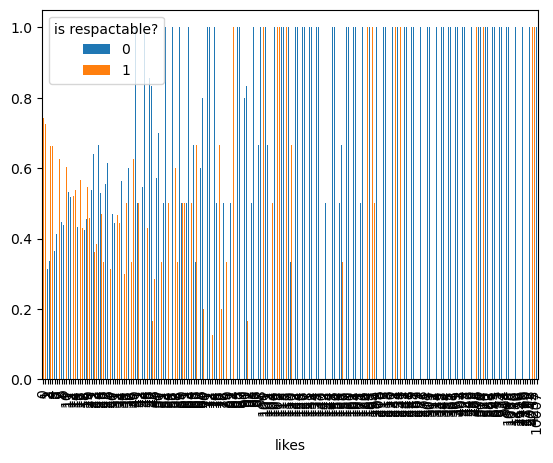

In [57]:
ct1.plot(kind='bar')

In [58]:
ct2=pd.crosstab(df['verified'],df['is respactable?'],normalize='index')
ct2

is respactable?,0,1
verified,,
False,0.313975,0.686025
True,0.873377,0.126623


<AxesSubplot:xlabel='verified'>

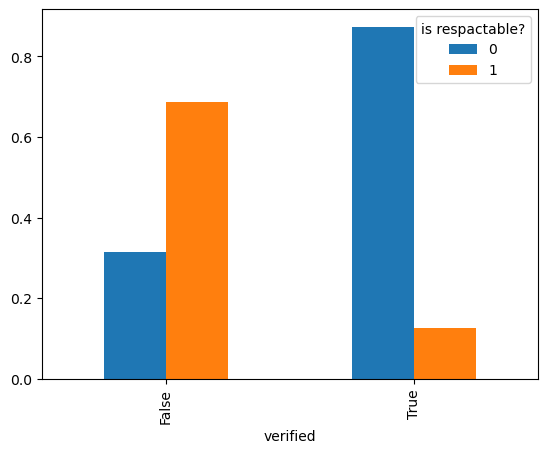

In [59]:
ct2.plot(kind='bar')

In [60]:
ct3=pd.crosstab(df['country'],df['is respactable?'],normalize='index')
ct3

is respactable?,0,1
country,,
Australia,0.320189,0.679811
Canada,0.355085,0.644915
New Zealand,0.351020,0.648980
United Kingdom,0.262899,0.737101
United States,0.376109,0.623891


<AxesSubplot:xlabel='country'>

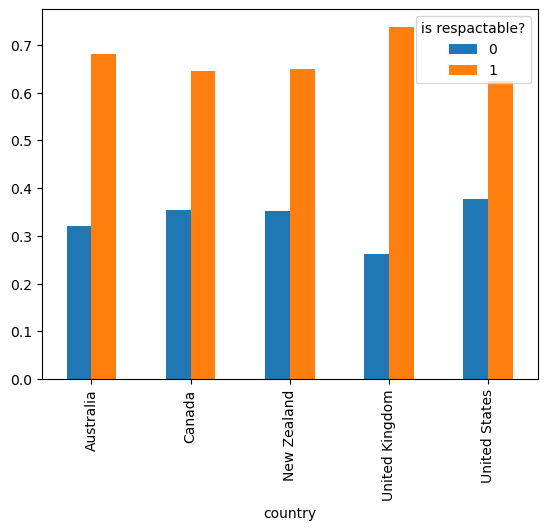

In [61]:
ct3.plot(kind='bar')

In [62]:
chi2_contingency(ct1)#לייקים ליחס עוקבים

(115.33931469474054,
 0.9999999943674331,
 213,
 array([[0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],
        [0.75372897, 0.24627103],


In [63]:
chi2_contingency(ct2)#מאומת ויחס עוקבים

(0.0,
 1.0,
 1,
 array([[0.59367571, 0.40632429],
        [0.59367571, 0.40632429]]))

In [64]:
chi2_contingency(ct3)#אין קשר בין מדינה לאם יחס העוקבים שלך טוב או לא 

(0.034885108954866566,
 0.9998496360531497,
 4,
 array([[0.3330606, 0.6669394],
        [0.3330606, 0.6669394],
        [0.3330606, 0.6669394],
        [0.3330606, 0.6669394],
        [0.3330606, 0.6669394]]))

In [65]:
countryvsre=pd.crosstab(df['country'],df['retweets'])
chi2_contingency(countryvsre)


(338.1355113216557,
 0.06396101755668873,
 300,
 array([[9.99332153e+02, 1.32299624e+02, 4.12471786e+01, 2.42712990e+01,
         1.20655012e+01, 1.10834255e+01, 7.01482629e+00, 5.75215756e+00,
         6.03275061e+00, 3.08652357e+00, 1.96415136e+00, 2.80593052e+00,
         1.82385484e+00, 8.41779155e-01, 1.40296526e+00, 1.40296526e+00,
         9.82075680e-01, 2.80593052e-01, 8.41779155e-01, 1.12237221e+00,
         7.01482629e-01, 7.01482629e-01, 8.41779155e-01, 2.80593052e-01,
         1.40296526e-01, 1.40296526e-01, 4.20889577e-01, 4.20889577e-01,
         1.40296526e-01, 2.80593052e-01, 2.80593052e-01, 2.80593052e-01,
         1.40296526e-01, 5.61186103e-01, 2.80593052e-01, 2.80593052e-01,
         1.40296526e-01, 2.80593052e-01, 1.40296526e-01, 1.40296526e-01,
         4.20889577e-01, 2.80593052e-01, 1.40296526e-01, 1.40296526e-01,
         1.40296526e-01, 1.40296526e-01, 1.40296526e-01, 1.40296526e-01,
         1.40296526e-01, 1.40296526e-01, 2.80593052e-01, 1.40296526e-01,
   

In [66]:
wordcountvsre=pd.crosstab(df['word count'],df['retweets'])
chi2_contingency(wordcountvsre)

(6508.148116034979,
 3.943883990146986e-84,
 4425,
 array([[1.82054990e+02, 2.41019031e+01, 7.51427307e+00, ...,
         2.55587519e-02, 2.55587519e-02, 2.55587519e-02],
        [3.08153684e+02, 4.07958619e+01, 1.27189644e+01, ...,
         4.32617836e-02, 4.32617836e-02, 4.32617836e-02],
        [2.18308365e+02, 2.89014162e+01, 9.01062182e+00, ...,
         3.06483735e-02, 3.06483735e-02, 3.06483735e-02],
        ...,
        [2.36435052e+00, 3.13011728e-01, 9.75879619e-02, ...,
         3.31931843e-04, 3.31931843e-04, 3.31931843e-04],
        [2.36435052e+00, 3.13011728e-01, 9.75879619e-02, ...,
         3.31931843e-04, 3.31931843e-04, 3.31931843e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04]]))

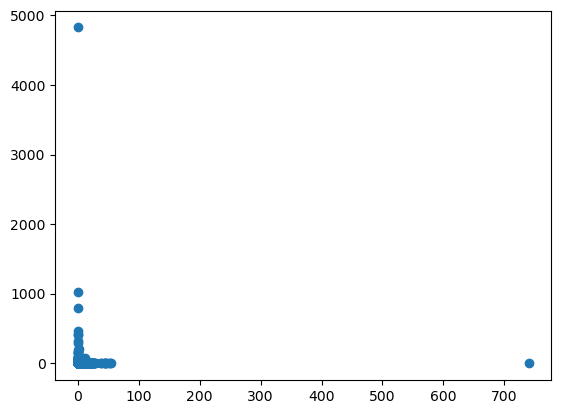

In [67]:
plt.scatter(df['respectability'],df['retweets'])

In [68]:
resvsre=pd.crosstab(df['respectability'],df['retweets'])
chi2_contingency(resvsre)

(632981.5585137086,
 5.647789962041319e-153,
 603600,
 array([[4.57107767e+01, 6.05156008e+00, 1.88670060e+00, ...,
         6.41734897e-03, 6.41734897e-03, 6.41734897e-03],
        [1.57623368e+00, 2.08674486e-01, 6.50586413e-02, ...,
         2.21287896e-04, 2.21287896e-04, 2.21287896e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        ...,
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04]]))

In [69]:
verifiedvsre=pd.crosstab(df['verified'],df['retweets'])
chi2_contingency(verifiedvsre)

(681.3235259470166,
 1.5071612910352743e-98,
 75,
 array([[6.88026001e+03, 9.10864129e+02, 2.83980969e+02, 1.67104448e+02,
         8.30692631e+01, 7.63078115e+01, 4.82960832e+01, 3.96027882e+01,
         4.15346316e+01, 2.12502766e+01, 1.35229033e+01, 1.93184333e+01,
         1.25569816e+01, 5.79552998e+00, 9.65921664e+00, 9.65921664e+00,
         6.76145165e+00, 1.93184333e+00, 5.79552998e+00, 7.72737331e+00,
         4.82960832e+00, 4.82960832e+00, 5.79552998e+00, 1.93184333e+00,
         9.65921664e-01, 9.65921664e-01, 2.89776499e+00, 2.89776499e+00,
         9.65921664e-01, 1.93184333e+00, 1.93184333e+00, 1.93184333e+00,
         9.65921664e-01, 3.86368666e+00, 1.93184333e+00, 1.93184333e+00,
         9.65921664e-01, 1.93184333e+00, 9.65921664e-01, 9.65921664e-01,
         2.89776499e+00, 1.93184333e+00, 9.65921664e-01, 9.65921664e-01,
         9.65921664e-01, 9.65921664e-01, 9.65921664e-01, 9.65921664e-01,
         9.65921664e-01, 9.65921664e-01, 1.93184333e+00, 9.65921664e-01,
 

In [70]:
comvsre=pd.crosstab(df['comments'],df['retweets'])
chi2_contingency(comvsre)

(196157.04168865125,
 0.0,
 4425,
 array([[5.30323822e+03, 7.02085306e+02, 2.18889799e+02, ...,
         7.44523125e-01, 7.44523125e-01, 7.44523125e-01],
        [1.02612813e+03, 1.35847090e+02, 4.23531755e+01, ...,
         1.44058420e-01, 1.44058420e-01, 1.44058420e-01],
        [3.18399203e+02, 4.21522461e+01, 1.31418455e+01, ...,
         4.47001549e-02, 4.47001549e-02, 4.47001549e-02],
        ...,
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04]]))

In [71]:
quovsre=pd.crosstab(df['is quote'],df['retweets'])
chi2_contingency(quovsre)

(73.06265910494591,
 0.5418044643762265,
 75,
 array([[5.20945231e+03, 6.89669175e+02, 2.15018809e+02, 1.26524674e+02,
         6.28966586e+01, 5.77771631e+01, 3.65678247e+01, 2.99856163e+01,
         3.14483293e+01, 1.60898429e+01, 1.02389909e+01, 1.46271299e+01,
         9.50763443e+00, 4.38813897e+00, 7.31356495e+00, 7.31356495e+00,
         5.11949546e+00, 1.46271299e+00, 4.38813897e+00, 5.85085196e+00,
         3.65678247e+00, 3.65678247e+00, 4.38813897e+00, 1.46271299e+00,
         7.31356495e-01, 7.31356495e-01, 2.19406948e+00, 2.19406948e+00,
         7.31356495e-01, 1.46271299e+00, 1.46271299e+00, 1.46271299e+00,
         7.31356495e-01, 2.92542598e+00, 1.46271299e+00, 1.46271299e+00,
         7.31356495e-01, 1.46271299e+00, 7.31356495e-01, 7.31356495e-01,
         2.19406948e+00, 1.46271299e+00, 7.31356495e-01, 7.31356495e-01,
         7.31356495e-01, 7.31356495e-01, 7.31356495e-01, 7.31356495e-01,
         7.31356495e-01, 7.31356495e-01, 1.46271299e+00, 7.31356495e-01,
     

In [72]:
hashvsre=pd.crosstab(df['hashtag count'],df['retweets'])
chi2_contingency(hashvsre)

(1430.4492249406778,
 0.45444934945141635,
 1425,
 array([[5.37022815e+03, 7.10953972e+02, 2.21654791e+02, ...,
         7.53927860e-01, 7.53927860e-01, 7.53927860e-01],
        [8.03879177e+02, 1.06423988e+02, 3.31799071e+01, ...,
         1.12856827e-01, 1.12856827e-01, 1.12856827e-01],
        [4.03515822e+02, 5.34206683e+01, 1.66550122e+01, ...,
         5.66497013e-02, 5.66497013e-02, 5.66497013e-02],
        ...,
        [3.15246736e+00, 4.17348971e-01, 1.30117283e-01, ...,
         4.42575791e-04, 4.42575791e-04, 4.42575791e-04],
        [1.57623368e+00, 2.08674486e-01, 6.50586413e-02, ...,
         2.21287896e-04, 2.21287896e-04, 2.21287896e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04]]))

In [73]:
trendvsre=pd.crosstab(df['using trends?'],df['retweets'])
chi2_contingency(trendvsre)

(114.60290937117115,
 0.0022138441327639977,
 75,
 array([[6.87080261e+03, 9.09612082e+02, 2.83590617e+02, 1.66874751e+02,
         8.29550786e+01, 7.62029210e+01, 4.82296968e+01, 3.95483514e+01,
         4.14775393e+01, 2.12210666e+01, 1.35043151e+01, 1.92918787e+01,
         1.25397212e+01, 5.78756362e+00, 9.64593937e+00, 9.64593937e+00,
         6.75215756e+00, 1.92918787e+00, 5.78756362e+00, 7.71675149e+00,
         4.82296968e+00, 4.82296968e+00, 5.78756362e+00, 1.92918787e+00,
         9.64593937e-01, 9.64593937e-01, 2.89378181e+00, 2.89378181e+00,
         9.64593937e-01, 1.92918787e+00, 1.92918787e+00, 1.92918787e+00,
         9.64593937e-01, 3.85837575e+00, 1.92918787e+00, 1.92918787e+00,
         9.64593937e-01, 1.92918787e+00, 9.64593937e-01, 9.64593937e-01,
         2.89378181e+00, 1.92918787e+00, 9.64593937e-01, 9.64593937e-01,
         9.64593937e-01, 9.64593937e-01, 9.64593937e-01, 9.64593937e-01,
         9.64593937e-01, 9.64593937e-01, 1.92918787e+00, 9.64593937e-01,
 

In [74]:
ctvsre=pd.crosstab(df['city'],df['retweets'])
chi2_contingency(ctvsre)

(155245.29999465222,
 1.0,
 195900,
 array([[7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [2.36435052e+00, 3.13011728e-01, 9.75879619e-02, ...,
         3.31931843e-04, 3.31931843e-04, 3.31931843e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        ...,
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04]]))

In [75]:
totalvsre=pd.crosstab(df['total tweets'],df['retweets'])
chi2_contingency(totalvsre)

(543507.658180839,
 4.1629259359767465e-12,
 536400,
 array([[4.72870104e+00, 6.26023457e-01, 1.95175924e-01, ...,
         6.63863687e-04, 6.63863687e-04, 6.63863687e-04],
        [7.09305156e+00, 9.39035185e-01, 2.92763886e-01, ...,
         9.95795530e-04, 9.95795530e-04, 9.95795530e-04],
        [1.57623368e+00, 2.08674486e-01, 6.50586413e-02, ...,
         2.21287896e-04, 2.21287896e-04, 2.21287896e-04],
        ...,
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [1.57623368e+00, 2.08674486e-01, 6.50586413e-02, ...,
         2.21287896e-04, 2.21287896e-04, 2.21287896e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04]]))

In [76]:
viewsvsre=pd.crosstab(df['views'],df['retweets'])
chi2_contingency(viewsvsre)

(622830.5156776512,
 0.0,
 145650,
 array([[3.07365568e+01, 4.06915247e+00, 1.26864351e+00, ...,
         4.31511396e-03, 4.31511396e-03, 4.31511396e-03],
        [4.88632441e+01, 6.46890905e+00, 2.01681788e+00, ...,
         6.85992476e-03, 6.85992476e-03, 6.85992476e-03],
        [5.04394778e+01, 6.67758354e+00, 2.08187652e+00, ...,
         7.08121266e-03, 7.08121266e-03, 7.08121266e-03],
        ...,
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04]]))

In [77]:
likesvsre=pd.crosstab(df['retweets'],df['likes'])
chi2_contingency(likesvsre)


(463622.3335886216,
 0.0,
 15975,
 array([[2.97041237e+03, 1.17902279e+03, 6.42315225e+02, ...,
         7.88116840e-01, 7.88116840e-01, 7.88116840e-01],
        [3.93247068e+02, 1.56088515e+02, 8.50348528e+01, ...,
         1.04337243e-01, 1.04337243e-01, 1.04337243e-01],
        [1.22603010e+02, 4.86638637e+01, 2.65113963e+01, ...,
         3.25293206e-02, 3.25293206e-02, 3.25293206e-02],
        ...,
        [4.17017039e-01, 1.65523346e-01, 9.01748174e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [4.17017039e-01, 1.65523346e-01, 9.01748174e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [4.17017039e-01, 1.65523346e-01, 9.01748174e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04]]))

In [78]:
quotretevsre=pd.crosstab(df['quote retweets'],df['retweets'])
chi2_contingency(quotretevsre)

(138832.4687049571,
 0.0,
 1650,
 array([[6.72106041e+03, 8.89788006e+02, 2.77410046e+02, ...,
         9.43571587e-01, 9.43571587e-01, 9.43571587e-01],
        [2.93179464e+02, 3.88134543e+01, 1.21009073e+01, ...,
         4.11595486e-02, 4.11595486e-02, 4.11595486e-02],
        [4.57107767e+01, 6.05156008e+00, 1.88670060e+00, ...,
         6.41734897e-03, 6.41734897e-03, 6.41734897e-03],
        ...,
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04],
        [7.88116840e-01, 1.04337243e-01, 3.25293206e-02, ...,
         1.10643948e-04, 1.10643948e-04, 1.10643948e-04]]))

In [79]:
df=df.drop(["link to tweet"], axis=1)

In [80]:
column_to_move = df.pop("retweets")

In [81]:
df.insert(df.shape[1], "retweets", column_to_move)

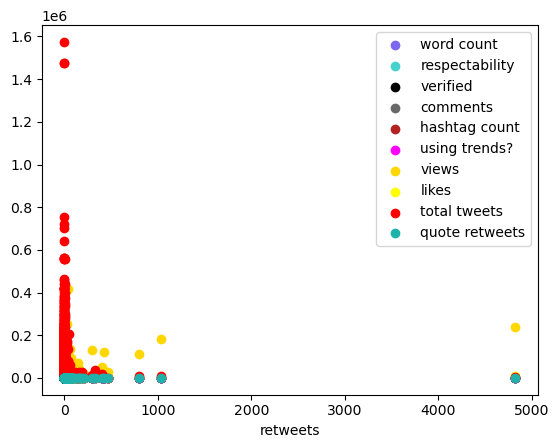

In [82]:
plt.scatter(y = df['word count'],    x = df['retweets'],c = 'mediumslateblue',label = 'word count');
plt.scatter(y = df['respectability'],x = df['retweets'],c = 'mediumturquoise',label = 'respectability');
plt.scatter(y = df['verified'],      x = df['retweets'],c = 'black',label = 'verified');
plt.scatter(y = df['comments'],      x = df['retweets'],c = 'dimgray',label = 'comments');
plt.scatter(y = df['hashtag count'], x = df['retweets'],c = 'firebrick',label = 'hashtag count');
plt.scatter(y = df['using trends?'], x = df['retweets'],c = 'fuchsia',label = 'using trends?');
plt.scatter(y = df['views'],         x = df['retweets'],c = 'gold',label = 'views');
plt.scatter(y = df['likes'],         x = df['retweets'],c = 'yellow',label = 'likes');
plt.scatter(y = df['total tweets'],  x = df['retweets'],c = 'red',label = 'total tweets');
plt.scatter(y = df['quote retweets'],x = df['retweets'],c = 'lightseagreen',label = 'quote retweets');

plt.legend(numpoints = 10, loc = 0)
plt.xlabel('retweets')

plt.show()

In [83]:
pd.DataFrame({'total tweets':df['total tweets'], 'ret':df['retweets']}).value_counts()

total tweets  ret
15            0      10
19            0       8
2             0       7
16            0       6
467           0       6
                     ..
6340          0       1
6337          0       1
6336          1       1
6333          0       1
1574466       0       1
Length: 7730, dtype: int64

In [84]:
df.describe()

,acount age,total tweets,followers,following,respectability,is respactable?,views,likes,quote retweets,comments,word count,hashtag count,retweets
count,9038.000000,9.038000e+03,9.038000e+03,9038.000000,9038.000000,9038.000000,9038.000000,9038.000000,9038.000000,9038.000000,9038.000000,9038.000000,9038.000000
mean,10.624751,2.503423e+04,4.829506e+03,1446.317659,1.894251,0.666962,1087.755477,12.323191,0.159106,1.066608,16.654348,0.649259,1.994468
std,4.477449,5.417727e+04,8.344993e+04,6019.725423,8.226239,0.471326,7957.449771,141.750203,3.097887,10.514568,12.689812,1.749821,53.737343
min,0.100000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6.900000,2.274250e+03,2.350000e+02,286.000000,0.563787,0.000000,44.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
50%,11.900000,8.783000e+03,6.410000e+02,682.000000,1.089680,1.000000,130.000000,1.000000,0.000000,0.000000,13.000000,0.000000,0.000000
75%,14.300000,2.674625e+04,1.743000e+03,1523.750000,2.082840,1.000000,437.000000,4.000000,0.000000,1.000000,24.000000,0.000000,0.000000
max,19.200000,1.574466e+06,6.752268e+06,435333.000000,740.000000,1.000000,414784.000000,10007.000000,261.000000,538.000000,64.000000,22.000000,4826.000000


In [115]:
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [116]:
df.reset_index(drop = True, inplace = True)
df.head()

,name,city,country,acount age,total tweets,followers,following,respectability,is respactable?,verified,text,views,likes,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,retweets
0,CamuyArenas_AA,Puente,United States,3.2,228,50,22,0.440000,0,False,Just posted a photo @ Estadio Juan F.Cheo Lópe...,13,0,0,0,11,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,0
1,PoopScoopSF,Downtown,United States,4.7,163626,415,125,0.301205,0,False,"""Big poop front of our door."" (Downtown, D3) h...",9,0,0,1,10,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,0
2,wchazz,Wesley Chapel,United States,15.4,48876,377,951,2.522546,1,False,"2nd cardio, target calories 1k @ Wesley Chapel...",4,0,0,0,10,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,0
3,CentralNY911,Syracuse,United States,7.7,34240,772,41,0.053109,0,False,01/13/2023 - 2:51 PM\nSyracuse Police dispatch...,50,0,0,0,24,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,0
4,meredithhurston,Baltimore,United States,14.5,4599,1966,2436,1.239064,1,False,Happy Friday! January is cervical cancer aware...,28,1,0,0,34,False,0,"['Friday the 13th', 'Staley', 'Phineas', 'Lori...",False,0


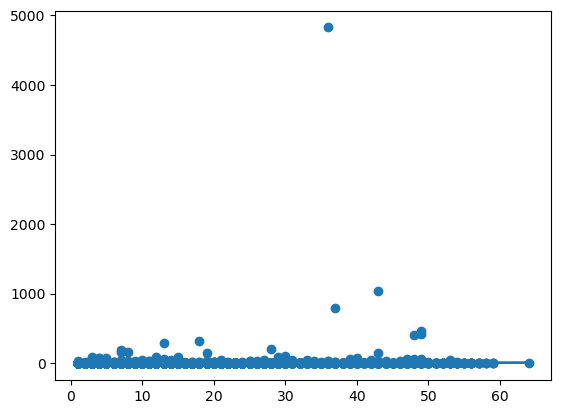

In [117]:
nm = 'word count'
m1=linear_model.LinearRegression().fit(df[nm].reset_index(),df['retweets'])

plt.scatter(x = df[nm], y = df['retweets'],label = nm)
plt.plot(df[nm],m1.predict(df[nm].reset_index()))

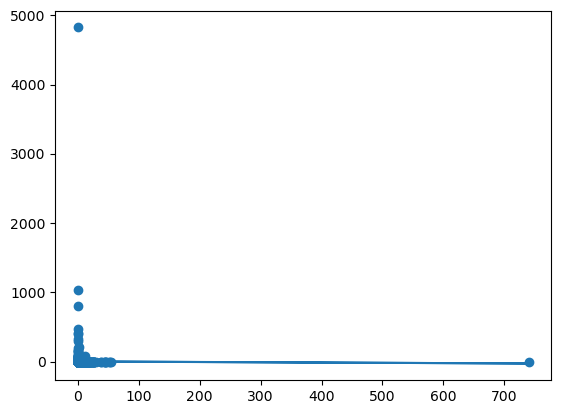

In [118]:
nm = 'respectability'
m2=linear_model.LinearRegression().fit(df[nm].reset_index(),df['retweets'])

plt.scatter(x = df[nm], y = df['retweets'],label = nm)
plt.plot(df[nm],m2.predict(df[nm].reset_index()))

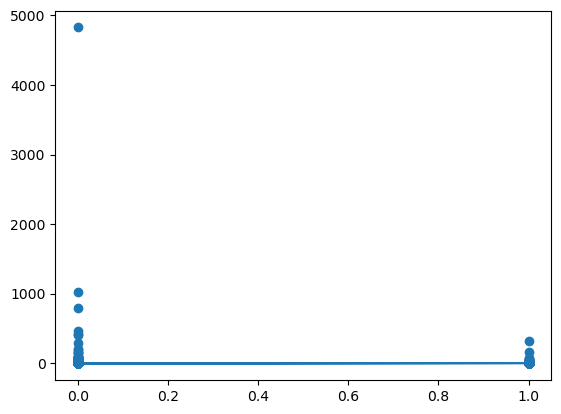

In [119]:
nm = 'verified'
m3=linear_model.LinearRegression().fit(df[nm].reset_index(),df['retweets'])

plt.scatter(x = df[nm], y = df['retweets'],label = nm)
plt.plot(df[nm],m3.predict(df[nm].reset_index()))

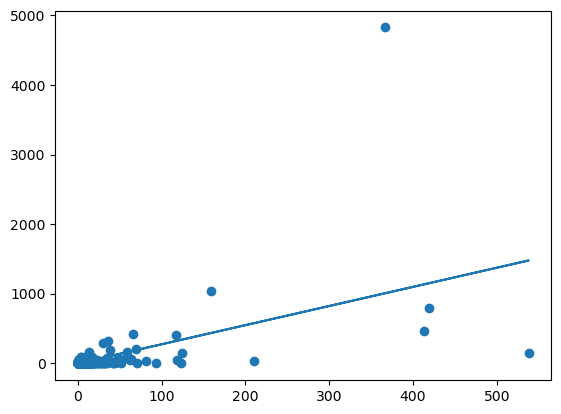

In [120]:
nm = 'comments'
m4=linear_model.LinearRegression().fit(df[nm].reset_index(),df['retweets'])

plt.scatter(x = df[nm], y = df['retweets'],label = nm)
plt.plot(df[nm],m4.predict(df[nm].reset_index()))

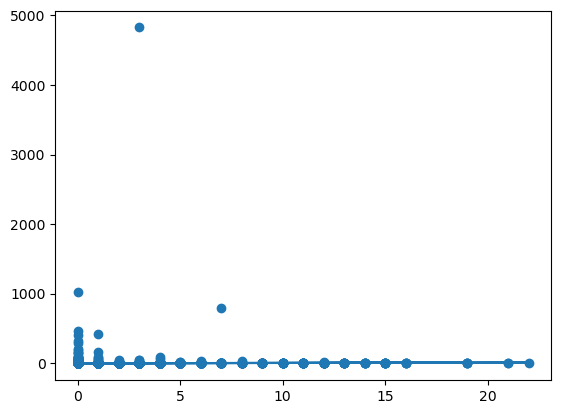

In [121]:
nm = 'hashtag count'
m5=linear_model.LinearRegression().fit(df[nm].reset_index(),df['retweets'])

plt.scatter(x = df[nm], y = df['retweets'],label = nm)
plt.plot(df[nm],m5.predict(df[nm].reset_index()))

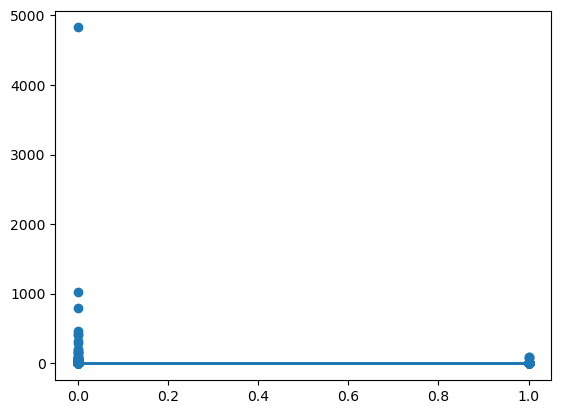

In [122]:
nm = 'using trends?'
m6=linear_model.LinearRegression().fit(df[nm].reset_index(),df['retweets'])

plt.scatter(x = df[nm], y = df['retweets'],label = nm)
plt.plot(df[nm],m6.predict(df[nm].reset_index()))

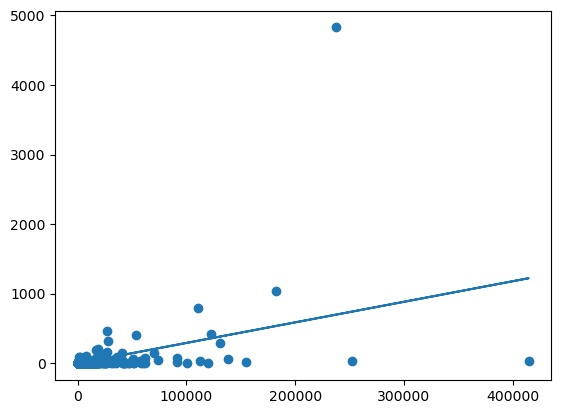

In [123]:
nm = 'views'
m7=linear_model.LinearRegression().fit(df[nm].reset_index(),df['retweets'])

plt.scatter(x = df[nm], y = df['retweets'],label = nm)
plt.plot(df[nm],m7.predict(df[nm].reset_index()))

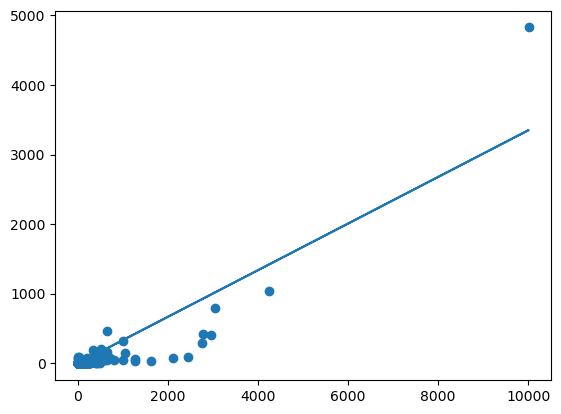

In [124]:
nm = 'likes'
m8=linear_model.LinearRegression().fit(df[nm].reset_index(),df['retweets'])

plt.scatter(x = df[nm], y = df['retweets'],label = nm)
plt.plot(df[nm],m8.predict(df[nm].reset_index()))

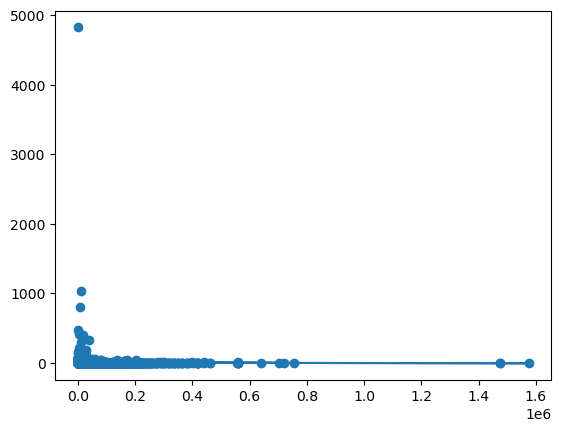

In [125]:
nm = 'total tweets'
m9=linear_model.LinearRegression().fit(df[nm].reset_index(),df['retweets'])

plt.scatter(x = df[nm], y = df['retweets'],label = nm)
plt.plot(df[nm],m9.predict(df[nm].reset_index()))

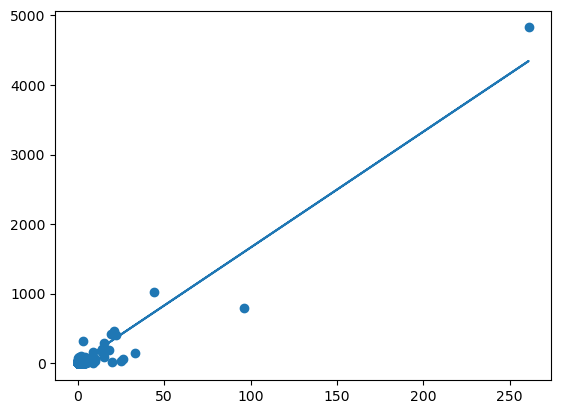

In [126]:
nm = 'quote retweets'
m10=linear_model.LinearRegression().fit(df[nm].reset_index(),df['retweets'])

plt.scatter(x = df[nm], y = df['retweets'],label = nm)
plt.plot(df[nm],m10.predict(df[nm].reset_index()))